In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm

In [144]:
data = pd.read_csv("train.csv", sep=',')
df = data.copy()

## 1. Pre Process

### 1-1 Gestions des valeurs manquantes

In [145]:
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


* Regardons le nombre de nan dans les feature far_price et near price

In [146]:
print("Nb de données manquantes pour la colonne far_price:", len(df[df["far_price"].isna()]))
print("Nb de données manquantes pour la colonne near_price:", len(df[df["near_price"].isna()]))

Nb de données manquantes pour la colonne far_price: 2894342
Nb de données manquantes pour la colonne near_price: 2857180


* Il faut compléter ces données, nous choisissons de les mettres arbitrairement à 1 (à voir si nous modifions ce choix plus tard)

In [147]:
df['far_price'] = df['far_price'].fillna(1)
df['near_price'] = df['near_price'].fillna(1)

* Regardons maintenant où est ce qu'il nous reste des valeurs manquantes

In [148]:
rows_with_missing_values = df[df.isna().any(axis=1)]

# Affichage des lignes avec des valeurs manquantes
rows_with_missing_values

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
369508,131,35,0,NaN,0,NaN,NaN,1.0,1.0,NaN,0.00,NaN,0.00,NaN,NaN,1925,35_0_131
369700,131,35,10,NaN,0,NaN,NaN,1.0,1.0,NaN,0.00,NaN,0.00,NaN,NaN,1926,35_10_131
369892,131,35,20,NaN,0,NaN,NaN,1.0,1.0,NaN,0.00,NaN,0.00,NaN,NaN,1927,35_20_131
370084,131,35,30,NaN,0,NaN,NaN,1.0,1.0,NaN,0.00,NaN,0.00,NaN,NaN,1928,35_30_131
370276,131,35,40,NaN,0,NaN,NaN,1.0,1.0,NaN,0.00,NaN,0.00,NaN,NaN,1929,35_40_131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4774999,19,438,500,NaN,-1,NaN,NaN,1.0,1.0,NaN,115491.18,NaN,1990.10,NaN,3.319979,24140,438_500_19
4775199,19,438,510,NaN,-1,NaN,NaN,1.0,1.0,NaN,189040.50,NaN,26283.84,NaN,-5.049705,24141,438_510_19
4775399,19,438,520,NaN,-1,NaN,NaN,1.0,1.0,NaN,1392.93,NaN,43799.80,NaN,-0.110269,24142,438_520_19
4775599,19,438,530,NaN,-1,NaN,NaN,1.0,1.0,NaN,13531.32,NaN,26881.20,NaN,-1.689792,24143,438_530_19


In [149]:
stock_concernés =set(rows_with_missing_values["stock_id"])
jours_concernés = set(rows_with_missing_values["date_id"])

print("Les stocks concernés sont:", stock_concernés)
print("Les jours concernés sont:", jours_concernés)

Les stocks concernés sont: {19, 131, 101, 158}
Les jours concernés sont: {328, 35, 388, 438}


In [150]:
len(set(rows_with_missing_values["time_id"]))

220

* Dans un premier temps, nous allons supprimer les 4 jours concernés par ces valeurs manquantes, nous ferons peut être differement plus tard (mettre à 0 comme ce que nous ferons pour la suite)

In [151]:
nb_stock = len(set(df["stock_id"]))
nb_mesures_par_jour = len(set(df["seconds_in_bucket"]))
nb_stock_concernés = len(stock_concernés)
nb_jours_concernés = len(jours_concernés)

nb_valeur_a_enlever = nb_stock * nb_mesures_par_jour * nb_jours_concernés

print("le nombre de valeurs a supprimer est", nb_valeur_a_enlever)

le nombre de valeurs a supprimer est 44000


In [152]:
df = df[~df['date_id'].isin(jours_concernés)]
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,1.000000,1.000000,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,1.000000,1.000000,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,1.000000,1.000000,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,1.000000,1.000000,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,1.000000,1.000000,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


* nous n'avons plus de nan

In [153]:
df[df.isna().any(axis=1)]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id


* Trouver les stocks manquant pour certains temps

In [154]:
missing_stock = [set(range(200)) - set(df[df['time_id']==i]['stock_id']) for i in list(set(df["time_id"]))]
nb_stock = [200-len(mi) for mi in missing_stock]
ids = list(set(df["time_id"]))
d_missing = {"time_id" : ids, "nb_stock" : nb_stock, "missing_stocks" : missing_stock}
df_missing = pd.DataFrame(d_missing)
df_missing = df_missing[df_missing["nb_stock"]!=200]

df_missing

,time_id,nb_stock,missing_stocks
0,0,191,"{69, 102, 135, 199, 78, 79, 150, 153, 156}"
1,1,191,"{69, 102, 135, 199, 78, 79, 150, 153, 156}"
2,2,191,"{69, 102, 135, 199, 78, 79, 150, 153, 156}"
3,3,191,"{69, 102, 135, 199, 78, 79, 150, 153, 156}"
4,4,191,"{69, 102, 135, 199, 78, 79, 150, 153, 156}"
...,...,...,...
17595,17650,199,{73}
17596,17651,199,{73}
17597,17652,199,{73}
17598,17653,199,{73}


In [155]:
def get_date_sec(df,time_id):
    dff = df[df["time_id"]==time_id]
    date_id = list(dff["date_id"])[0]
    seconds_in_bucket = list(dff["seconds_in_bucket"])[0]
    return date_id,seconds_in_bucket

* Nous allons donc ajouter des valeurs atificielles de stocks à 0 pour combler les valeurs manquantes (ne vaut il mieux pas ajouter une moyenne du meme jour ou une moyenne de cette stock sur la journée)

In [156]:
nb_stocks = len(set(df["stock_id"]))
new_rows = []

for index, row in tqdm(df_missing.iterrows()):
    time_id = row["time_id"]
    date_id,seconds_in_bucket = get_date_sec(df,time_id)
    for stock in row["missing_stocks"]:
        new_row = [stock,date_id,seconds_in_bucket] + [0]*12 + [time_id, len(df)]
        new_rows.append(new_row)

new_df = pd.DataFrame(new_rows, columns=df.columns)
df = pd.concat([df, new_df], ignore_index=True)

df = df.sort_values(by=['date_id', 'seconds_in_bucket'])

16225it [00:32, 493.45it/s]


In [157]:
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,1.000000,1.000000,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,1.000000,1.000000,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,1.000000,1.000000,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,1.000000,1.000000,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,1.000000,1.000000,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194415,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5194416,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5194417,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5194418,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


In [158]:
df.to_csv("pre_proccessed.csv", index=False)

### 1-2 Choix des features

In [210]:
data = pd.read_csv("pre_proccessed.csv", sep=',') 
df = data.copy()

In [211]:
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,1.000000,1.000000,0.999812,60651.50,1.000026,8493.03,1.000000,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,1.000000,1.000000,0.999896,3233.04,1.000660,20605.09,1.000000,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,1.000000,1.000000,0.999403,37956.00,1.000298,18995.00,1.000000,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,1.000000,1.000000,0.999999,2324.90,1.000214,479032.40,1.000000,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,1.000000,1.000000,0.999394,16485.54,1.000016,434.10,1.000000,-7.349849,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5246995,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,2.310276,26454,480_540_195
5246996,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,-8.220077,26454,480_540_196
5246997,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,1.169443,26454,480_540_197
5246998,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,-1.540184,26454,480_540_198


* Essayons d'abord de voir s'il y a une corrélation entre la target et les features, ça pourrait aider à définir quelles variables sont importantes

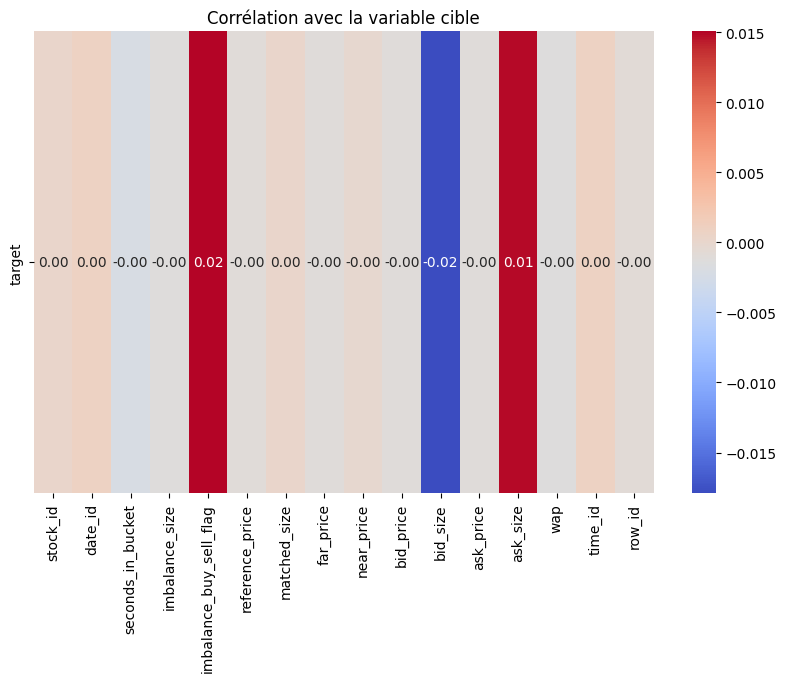

In [212]:
correlation_with_target = df.corr().loc['target'].drop('target')

plt.figure(figsize=(10, 6))  # Ajustement de la taille de la figure
sns.heatmap(correlation_with_target.to_frame().T, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Corrélation avec la variable cible')
plt.show()

* Suppression des colonnes stock_id, date_id, time_id, row_id

In [213]:
df = df.drop("stock_id",axis=1)
df = df.drop("date_id",axis=1)
df = df.drop("seconds_in_bucket",axis=1)
df = df.drop("row_id",axis=1)

* Affichons la matrice de corrélation entre les features pour voir si nous pouvons ne pas utiliser cerrtaines pour notre modèle

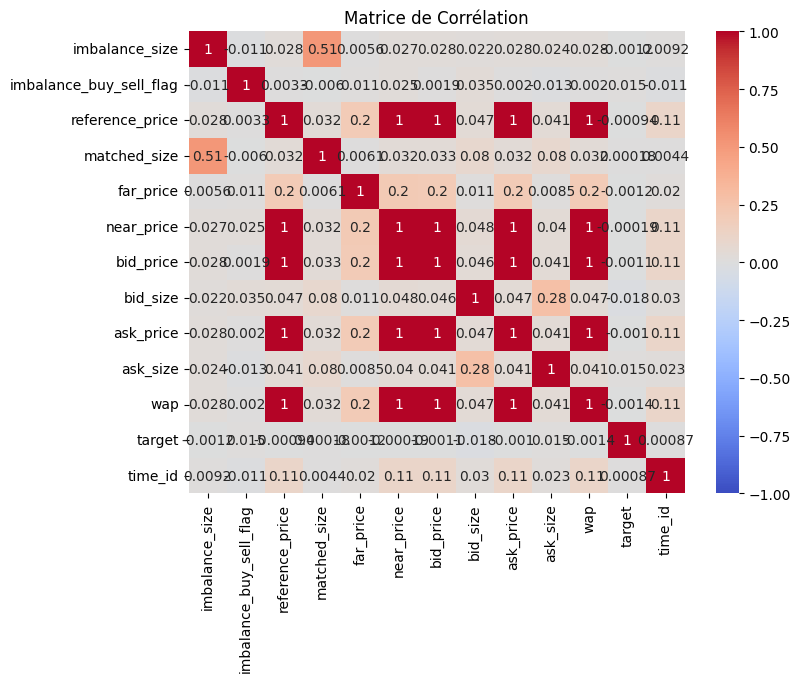

In [214]:
# Calcul de la matrice de corrélation
correlation_matrix = df.corr()

# Création d'une heatmap avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de Corrélation')
plt.show()


* Au vu de la corrélation, nous supprimon les colonnes reference_price, bid_price et ask_price (peut être utile de les garder pour indiquer l'importance de ces features?)

In [215]:
df = df.drop("reference_price",axis=1)
df = df.drop("bid_price",axis=1)
df = df.drop("ask_price",axis=1)

In [ ]:
df

### 1-3 Normalisation + Visualisation

In [192]:
from sklearn.preprocessing import StandardScaler

In [217]:
# Sélectionner les n premières colonnes à normaliser
cols_to_normalize = df.columns[:-2]
df_subset = df[cols_to_normalize]

scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_subset)

df[cols_to_normalize] = df_normalized

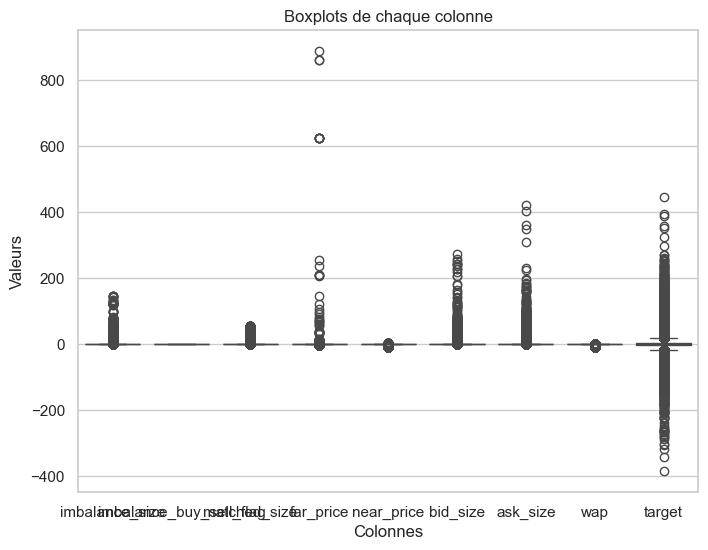

In [219]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[df.columns[:-1]])
plt.title('Boxplots de chaque colonne')
plt.xlabel('Colonnes')
plt.ylabel('Valeurs')
plt.show()

* Nous voyons que nous avons un grand nombre de valeurs extrêmes, peut etre faudrait il utiliser un model anova pour choisir les données que nous considérons comme utilisables pour notre model, et restreindre notre jeu de donnée à ces valeurs là, et traiter différemment les données extremes. A voir egalement si les valeurs extremes pour les features conduisent à des valeurs extremes pour la target

### 1-3 Mise en forme des données pour nos models

* Séparons nos données entre les inputs et la target

In [220]:
X,y = df.drop("target",axis=1), df["target"]

* On regroupe les données par time_id, donc une ligne du jeu de données contient toutes les données pour chaque stock d'un time_id

In [221]:
X = X.pivot_table(index='time_id', columns=X.groupby('time_id').cumcount() + 1, aggfunc='first')
X.columns = [f'{col[0]}_{col[1]}' for col in X.columns]

In [222]:
X

,ask_size_1,ask_size_2,ask_size_3,ask_size_4,ask_size_5,ask_size_6,ask_size_7,ask_size_8,ask_size_9,ask_size_10,...,wap_191,wap_192,wap_193,wap_194,wap_195,wap_196,wap_197,wap_198,wap_199,wap_200
time_id,,,,,,,,,,,,,,,,,,,,,
0,-0.345465,-0.251492,-0.263984,3.305282,-0.407991,-0.367541,-0.381795,-0.391415,-0.394528,-0.363263,...,0.100650,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263
1,-0.228882,-0.149758,-0.408412,-0.317557,-0.299045,0.862877,-0.392880,-0.406369,-0.394524,-0.363225,...,0.102878,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263
2,-0.317234,-0.149758,-0.406940,-0.230955,-0.128406,0.133842,-0.385488,-0.406368,-0.394528,-0.265464,...,0.104675,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263
3,-0.052884,-0.383623,-0.409886,-0.321165,-0.403500,0.557789,-0.392880,-0.236748,3.646346,-0.266932,...,0.104956,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263
4,-0.204898,-0.383623,-0.028324,-0.398728,-0.386659,-0.077513,-0.392880,-0.306593,-0.394524,-0.312170,...,0.105899,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263,-9.936263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26450,0.721954,0.087871,1.063697,-0.219175,-0.394402,-0.206647,0.352275,-0.347918,0.356374,0.051823,...,0.096464,0.067217,0.106250,0.117010,0.119720,0.103139,0.108077,0.062108,0.093855,0.129104
26451,0.526863,-0.045650,1.250146,1.340894,0.083246,-0.304924,0.870935,-0.401600,0.086623,-0.233822,...,0.096806,0.065199,0.106792,0.116378,0.120975,0.103952,0.108750,0.063092,0.093835,0.130500
26452,-0.048405,0.251029,0.403563,1.297400,0.436536,0.359449,-0.399836,-0.406480,1.663488,-0.352564,...,0.096043,0.061576,0.106090,0.115514,0.121135,0.104133,0.108830,0.061416,0.093744,0.120543


* On ajuste également les target pour que ce soit un vecteur à 200 colonnes, avec donc autant d'entrées que X

In [19]:
y = pd.DataFrame(np.array(y['target']).reshape(len(y)//200,200))

In [20]:
y

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-3.029704,-5.519986,-8.389950,-4.010200,-7.349849,6.779432,-2.499819,-1.959801,-5.970001,7.970333,...,-0.510216,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.389814,-1.620054,-7.460117,-1.040101,-6.719828,7.710457,-4.280209,-8.010268,-0.780225,-0.640154,...,-1.419783,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,4.220009,-6.459951,-6.380081,-2.030134,-0.690222,1.009703,2.930164,-12.069941,-4.119873,-3.250241,...,2.599955,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,5.450249,-5.149841,-5.819797,1.130104,-2.589822,-3.089905,0.560284,-6.909967,-1.090169,-6.759763,...,3.010035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,3.169775,-6.750226,-0.280142,-2.350211,-4.900098,-2.070069,2.199411,-1.209974,-3.100038,-8.199811,...,4.669428,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26230,3.999472,2.850294,-4.450083,1.720190,1.939535,-4.569888,-0.630021,-1.729727,-0.680089,3.540516,...,-4.730225,-7.420182,2.959967,-2.359748,-0.650287,3.190041,-1.659989,-0.690222,-2.700090,-7.209778
26231,3.190041,3.169775,-5.559921,4.669428,2.139807,1.679659,-0.360012,-3.240108,2.609491,1.679659,...,-3.340244,-3.479719,1.419783,-1.069903,2.319813,3.770590,-3.039837,-3.299713,-2.070069,-9.750128
26232,-0.169873,5.689859,-5.310178,5.639792,1.660585,2.110004,-1.000166,-4.529953,5.409718,0.350475,...,-1.549721,-1.289845,-0.140071,-1.929998,4.609823,1.449585,-6.319881,-1.999736,-2.239943,3.629923
26233,3.110170,10.650158,-5.239844,5.229711,0.300407,-2.030134,-1.180172,-1.310110,3.240108,0.220537,...,-1.440048,-0.299811,-2.120137,-1.350045,3.110170,4.019737,-7.349849,-3.259778,-3.160238,4.760027


In [21]:
X.to_csv("data.csv", index=False)
y.to_csv("target.csv", index=False)

## 2 - Models

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score

/Users/U1012656/Documents/2IA/9.6 Deep Learning/Projet/Optiver_challenge/.venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
X = pd.read_csv("data.csv", sep=',') 
y = pd.read_csv("target.csv", sep=',') 

### 2-1 LSTM

In [4]:
def prepare_data_for_lstm(X, y, n_steps):
    X_lstm, y_lstm = [], []
    for i in range(len(X) - n_steps):
        X_lstm.append(X.iloc[i:(i + n_steps)].values)
        y_lstm.append(y.iloc[i + n_steps].values)
    return np.array(X_lstm), np.array(y_lstm)


### 2-1-1 LSTM simple

* Hyperparametres

In [40]:
n_steps = 10
d_in = (n_steps, X.shape[1])
d_out = y.shape[1]
learning_rate = 0.01
data_test = 55 * 50

In [56]:
y_lstm.shape

(26225, 200)

In [42]:
X_lstm, y_lstm = prepare_data_for_lstm(X, y, n_steps)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = X_lstm[:-data_test],X_lstm[data_test:],y_lstm[:-data_test],y_lstm[data_test:]

# Créer un modèle LSTM plus complexe
model = Sequential()
model.add(LSTM(128, activation='tanh', input_shape=d_in))
model.add(Dense(d_out))

# Compilation du modèle
optimizer_legacy = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer_legacy, loss='mae')

# Entraînement du modèle avec validation_data
history = model.fit(X_train, y_train, epochs=10, batch_size=64, verbose=1, validation_split=0.2)

y_pred = model.predict(X_test)
loss = model.evaluate(X_test, y_test)
print(f'Perte (Loss) sur l\'ensemble de test : {loss}')

Epoch 1/10
294/294 [==============================] - 5s 16ms/step - loss: 6.4088 - val_loss: 6.3326
Epoch 2/10
294/294 [==============================] - 4s 15ms/step - loss: 6.3840 - val_loss: 6.3477
Epoch 3/10
294/294 [==============================] - 5s 16ms/step - loss: 6.3575 - val_loss: 6.3640
Epoch 4/10
294/294 [==============================] - 5s 17ms/step - loss: 6.3363 - val_loss: 6.3910
Epoch 5/10
294/294 [==============================] - 5s 16ms/step - loss: 6.3185 - val_loss: 6.3900
Epoch 6/10
294/294 [==============================] - 5s 17ms/step - loss: 6.3044 - val_loss: 6.4078
Epoch 7/10
294/294 [==============================] - 4s 15ms/step - loss: 6.2875 - val_loss: 6.4476
Epoch 8/10
294/294 [==============================] - 4s 14ms/step - loss: 6.2755 - val_loss: 6.4399
Epoch 9/10
294/294 [==============================] - 5s 15ms/step - loss: 6.2641 - val_loss: 6.4602
Epoch 10/10
734/734 [==============================] - 3s 3ms/step - loss: 6.4088
Perte (Lo

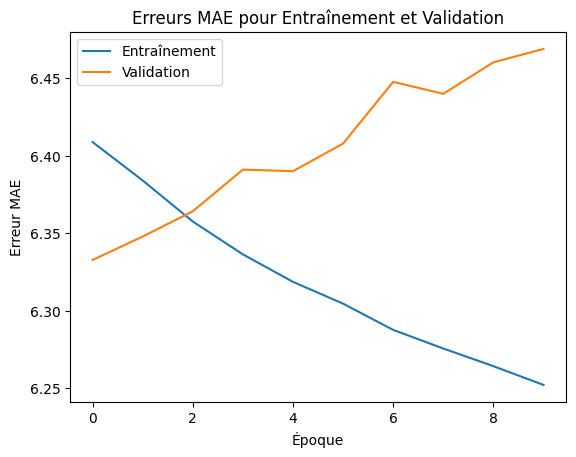

In [43]:
# Récupérer les erreurs MAE pour les ensembles d'entraînement et de validation à chaque époque
train_mae = history.history['loss']
val_mae = history.history['val_loss']

# Tracer les courbes et ajouter des légendes
plt.plot(train_mae, label='Entraînement')
plt.plot(val_mae, label='Validation')

# Ajouter des titres et des légendes au graphique
plt.title('Erreurs MAE pour Entraînement et Validation')
plt.xlabel('Époque')
plt.ylabel('Erreur MAE')
plt.legend()

# Afficher le graphique
plt.show()

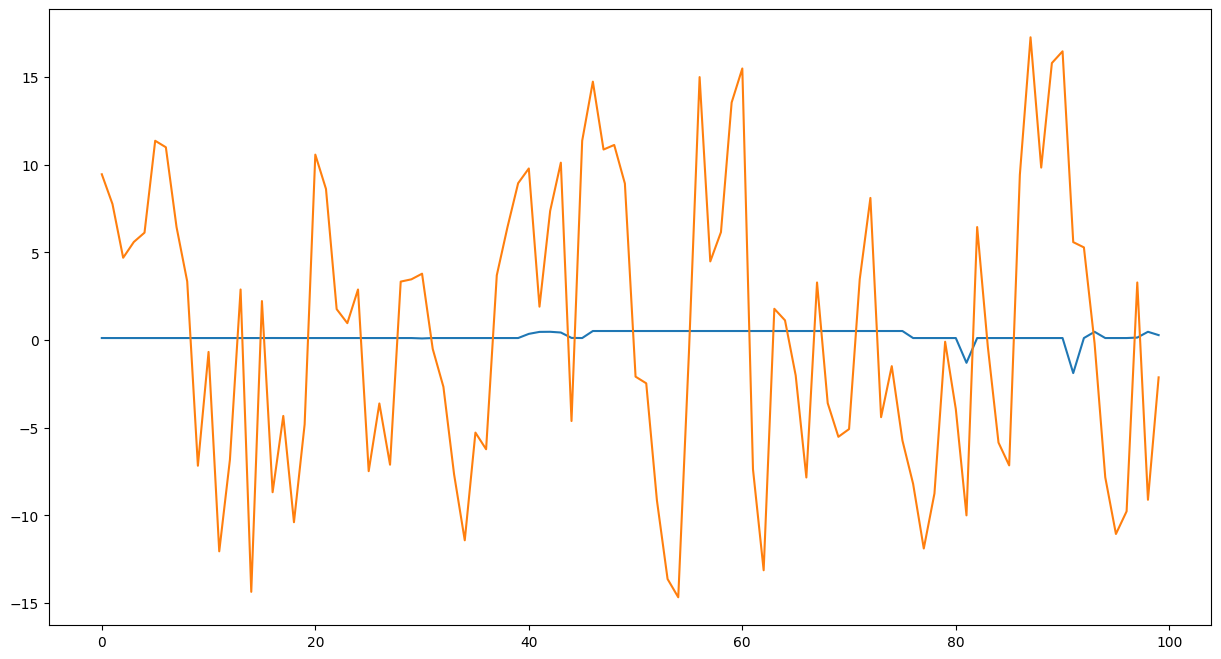

In [44]:
fig = plt.figure(figsize=(15,8))
n=100
s=1
plt.plot(y_pred[:n,s])
plt.plot(y_test[:n,s])

### 2-1-2 LSTM plus complexe

In [45]:
n_steps = 10
d_in = (n_steps, X.shape[1])
d_out = y.shape[1]
learning_rate = 0.01
data_test = 55 * 50

In [46]:
X_lstm, y_lstm = prepare_data_for_lstm(X, y, n_steps)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = X_lstm[:-data_test],X_lstm[data_test:],y_lstm[:-data_test],y_lstm[data_test:]

# Créer un modèle LSTM plus complexe
model = Sequential()

model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=d_in))
model.add(BatchNormalization())

model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(BatchNormalization())

model.add(LSTM(32, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(d_out))

# Compilation du modèle
optimizer_legacy = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer_legacy, loss='mae')

# Entraînement du modèle avec validation_data
history = model.fit(X_train, y_train, epochs=10, batch_size=55, verbose=1, validation_split=0.2)

y_pred = model.predict(X_test)
loss = model.evaluate(X_test, y_test)
print(f'Perte (Loss) sur l\'ensemble de test : {loss}')

Epoch 1/10
342/342 [==============================] - 11s 28ms/step - loss: 6.4190 - val_loss: 6.3119
Epoch 2/10
342/342 [==============================] - 9s 27ms/step - loss: 6.4158 - val_loss: 6.3121
Epoch 3/10
342/342 [==============================] - 9s 27ms/step - loss: 6.4160 - val_loss: 6.3118
Epoch 4/10
342/342 [==============================] - 9s 27ms/step - loss: 6.4163 - val_loss: 6.3118
Epoch 5/10
342/342 [==============================] - 9s 27ms/step - loss: 6.4161 - val_loss: 6.3125
Epoch 6/10
342/342 [==============================] - 10s 28ms/step - loss: 6.4159 - val_loss: 6.3129
Epoch 7/10
342/342 [==============================] - 10s 29ms/step - loss: 6.4159 - val_loss: 6.3128
Epoch 8/10
342/342 [==============================] - 9s 27ms/step - loss: 6.4158 - val_loss: 6.3261
Epoch 9/10
342/342 [==============================] - 10s 28ms/step - loss: 6.4161 - val_loss: 6.3124
Epoch 10/10
734/734 [==============================] - 4s 5ms/step - loss: 6.4920
Perte

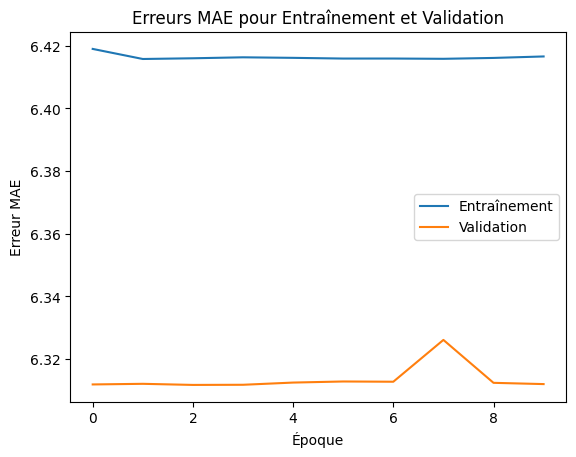

In [47]:
# Récupérer les erreurs MAE pour les ensembles d'entraînement et de validation à chaque époque
train_mae = history.history['loss']
val_mae = history.history['val_loss']

# Tracer les courbes et ajouter des légendes
plt.plot(train_mae, label='Entraînement')
plt.plot(val_mae, label='Validation')

# Ajouter des titres et des légendes au graphique
plt.title('Erreurs MAE pour Entraînement et Validation')
plt.xlabel('Époque')
plt.ylabel('Erreur MAE')
plt.legend()

# Afficher le graphique
plt.show()

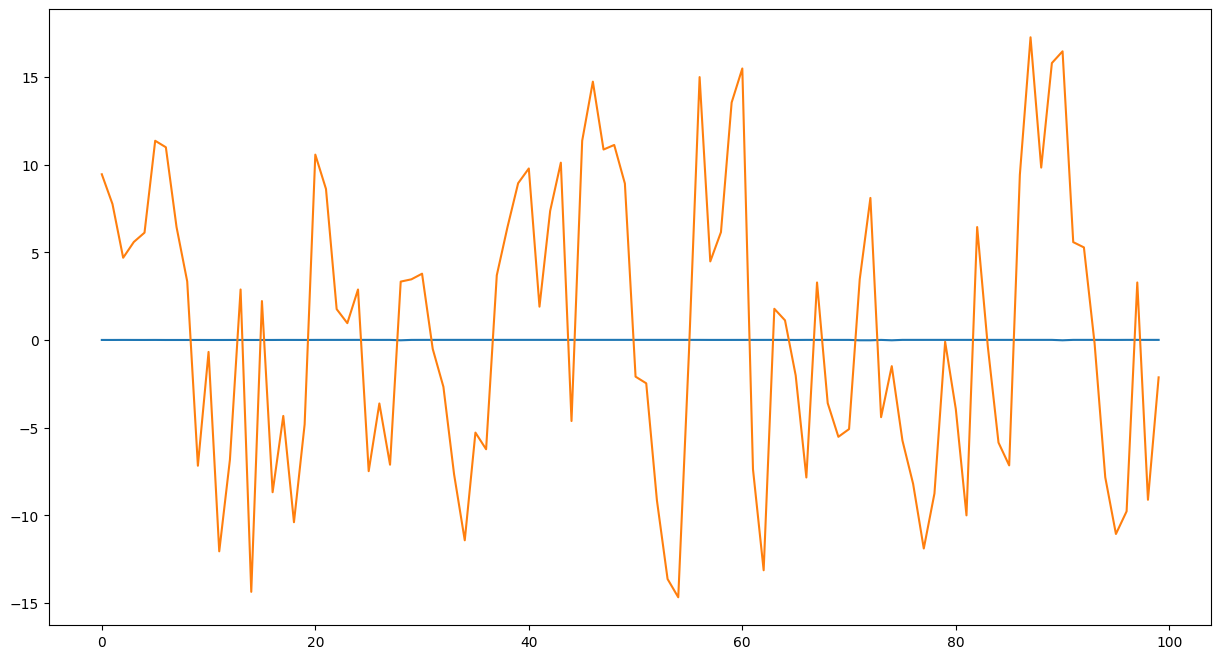

In [49]:
fig = plt.figure(figsize=(15,8))
n=100
s=1
plt.plot(y_pred[:n,s])
plt.plot(y_test[:n,s])

## 3 - Brouillons

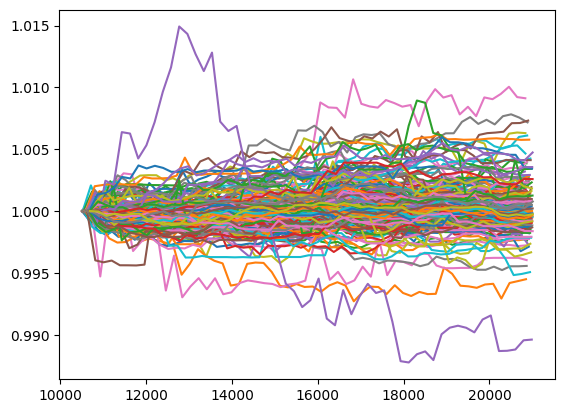

In [13]:
d = 1

for s in range(200):

    price = df[(df["stock_id"]==s) & (df["date_id"]==d)]["wap"]
    plt.plot(price)

In [14]:
# d2(imbalance)

# Calcul de la première dérivée
df['derivative_1'] = df['imbalance_size'].diff()

# Calcul de la dérivée seconde
df['derivative_2'] = df['derivative_1'].diff()

In [15]:
df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id,derivative_1,derivative_2
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.000000,0,0_0_0,NaN,NaN
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.000000,0,0_0_1,-3013998.78,NaN
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.000000,0,0_0_2,136275.96,3150274.74
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.000000,0,0_0_3,11614802.40,11478526.44
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.000000,0,0_0_4,-11470132.31,-23084934.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,32257.04,1.000434,319862.40,1.000328,26454,480_540_195,2178451.37,8417127.89
5237976,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,205108.40,1.000900,93393.07,1.000819,26454,480_540_196,-2091212.42,-4269663.79
5237977,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,16790.66,0.995883,180038.32,0.995797,26454,480_540_197,-349510.47,1741701.95
5237978,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,125631.72,0.999210,669893.00,0.999008,26454,480_540_198,1000898.84,1350409.31
